# Law & Order SVU transcript analysis

## Introduction

I'm interested in the differences between episodes from the first 12 seasons of law and order SVU. There are a lot of things I liked about the first few seasons, but I think they really hit the sweet spot around seasons 3-7. Although I I suspect it has a lot to do with the cast( Ice-T wasn't brought on as a cast member until a late into season two), and some other changes to the basic formula, I'm curious if there were changes in the transcript content or sentiment that could have influenced my feelings.

I gathered the data by conducting a google search("law and order SVU transcripts") and choosing one of the first believable enough results. I could have taken more time in this process to ensure the reliability and accuracy of the transcripts, but chose to go with it and proceed with my project.

The elements I intend to look at are the word frequency, and topics- which both speak to the subject matter of the episodes that may appeal more or less to me. Also, the sentiment and subjectiveness of the transcripts, to explore the possibility of my preference to more positive or negative, and subjective or objective scripting.

To conclude, for fun, I will attempt to generate random text identifying with episodes of the show.



_*While I think seasons 3-7 are the best, I looked up (on google again of course), which seasons other people prefer.
according to the following url, they're preferred in the order of 5, 10, 6, 1, 4, 3, 2, 9, 7, 8, 14, 11. I just thought I'd keep that in mind during analysis to see if there are any correlations there._

https://www.ranker.com/list/best-seasons-of-law-and-order/ranker-tv

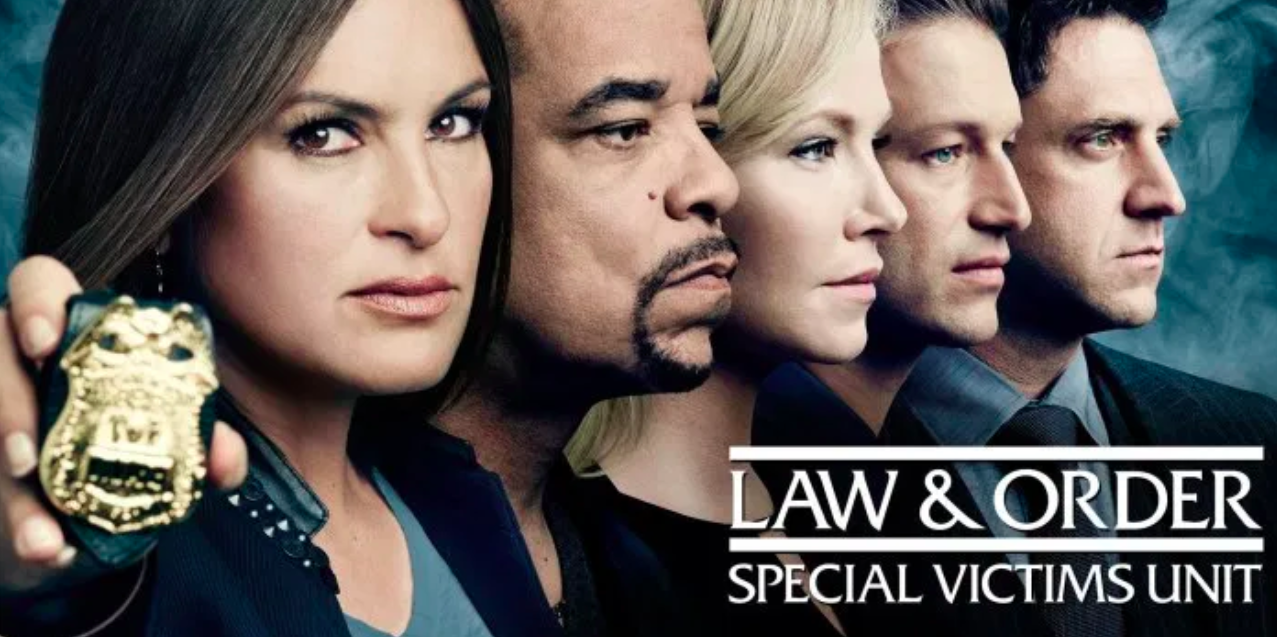

Goal: look at the differences in seasons' episodes to determine if the transcripts provide reasonable cause as to why certain seasons are 'better'(in my opinion) than others.

### imports

__*__ _Law and order episode transcripts obtained from: __'transcripts.foreverdreaming.org'___

In [1]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import urllib.request
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words()
nltk.download('stopwords', 'wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import re
from pywsd.utils import lemmatize_sentence
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
import math
from gensim import matutils, models
import scipy.sparse
from nltk import word_tokenize, pos_tag
from collections import defaultdict
import random
import string

[nltk_data] Downloading package stopwords to wordnet...
[nltk_data]   Package stopwords is already up-to-date!
Warming up PyWSD (takes ~10 secs)... took 5.939502000808716 secs.


### nlp functions

In [2]:
def url_to_transcript(url):
    response = urllib.request.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, 'html5lib')
    text = soup.get_text(strip = True)
    return text

In [3]:
## !!! make this function work, and reusable
# def find_context(x, prev_chars=10,following_chars=10):
#         for i in range(0,12):
#                 start = transcripts_cleaned[i].find(x)
#                 print(transcripts_cleaned[i][start-(prev_chars):(following_chars)+65])

In [4]:
# !make more reusable?
# find instance of substring in transcripts
def find_context(x, strt=9, end=9):
    for i in range(0,12):
        start = transcripts_cleaned[i].find('*')
        print(transcripts_cleaned[i][start-strt:start+end])

In [5]:
def clean_trans(text):
    '''lowercase, remove punctuation, numbers, single characters'''
    import string
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text =  re.sub(r"\b[a-zA-Z]\b", " ", text)
    text.strip()
    return text

In [6]:
def split_text(text, n=7):
    '''input string of text, split into n equal parts'''

    # calculate length of text, size and starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # pull equally sized pieces of text into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [7]:
def generate_sentence(chain, count=12):
    '''input dictionary in the format of key = current word, value = list of next words
       along with number of words to see in generated sentence.'''

    # capitalize first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # generate the second word from value list. set new word as the first word. repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # end with a period
    sentence += '.'
    return(sentence)

In [8]:
def markov_chain(text):
    '''input string of text, output dictionary with each word
       a key, each value as list of words that come after the key in the text'''
    
    # tokenize the text by word, including punctuation
    words = text.split(' ')
    
    # initialize default dictionary to hold all words and next words
    m_dict = defaultdict(list)
    
    # zipped list of all word pairs and in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [9]:
def gen_text(episode, count = 12):   
    # Extract text
    ep1_text = transcripts_cleaned[(episode-1)]
    # create dict take a look at it
    ep1_dict = markov_chain(ep1_text)
    print(generate_sentence(ep1_dict, count))

## get data

_*The whole notebook can easily be replicated with alternative transcripts by replacing 'urls'(being valid urls of transcripts) and 'seasons'(list of strings), with equal lengths of each._ 

In [10]:
# URLs of episode 1-12 transcripts
urls = ['https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21377/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21402/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21427/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21453/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21477/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21502/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21527/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21553/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21577/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21603/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21628/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21679/']

# seasons
seasons = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve']

In [11]:
# reading and cleaning transcripts from urls
transcripts = [url_to_transcript(u) for u in urls]

In [12]:
transcripts

['01x01 - Payback - Law & Order: Special Victims Unit Transcripts - Forever Dreaming(adsbygoogle = window.adsbygoogle || []).push({\n\t\tgoogle_ad_client: "ca-pub-3808023418243141",\n\t\tenable_page_level_ads: true\n\t});Toggle navigationHomeA-Z ListSearchAboutForumDonateFAQContactLoginFollowLaw & Order: Special Victims Unit TranscriptF.D.»Transcripts»TV Show Transcripts»L»Law & Order: Special Victims UnitEditor:TrialiaPrint view01x01 - Payback01x01 - Payback09/25/99 18:08(adsbygoogle = window.adsbygoogle || []).push({});In the criminal justice system, sexually-based offenses are considered especially heinous. In New York City, the dedicated detectives who investigate these vicious felonies are members of an elite squad known as The Special Victims Unit. These are their stories.s*x Crimes?Olivia Benson.Elliot Stabler.Frank Bremmer, two-seven. A white male, mid-30s.Multiple stab wounds.$40 left in the cigar box.Hack license made out to Victor Spicer.12 more dollars in the wallet... it w

In [13]:
original_transcripts = transcripts.copy()

## initial cleaning

For each episode, there exists some html jargon and other unwanted text. It appears to be the same string ending and beginnings of text, so I'll use those to extract the script in between.

In [14]:
first_cutoff = 'These are their stories'
second_cutoff = '(adsbygoogle = window.adsbygoogle || []).push({});Law & Order:'

cut_offs1 = [transcripts[i].index(first_cutoff) for i in range(0,12)]
cut_offs2 = [transcripts[i].index(second_cutoff) for i in range(0,12)]

In [15]:
# cutting off junk and placing in new list
transcripts_cleaned = []
for cut_off, cut_off2, i in zip(cut_offs1, cut_offs2, range(0,13)):
    transcripts_cleaned.append(transcripts[i][(cut_off + len(first_cutoff)+1):(cut_off2)])

to_remove = ('adsbygoogle = window.adsbygoogle || []).push({});')
transcripts_cleaned =[x.replace(to_remove, '') for x in transcripts_cleaned]

- some possible cases of profanity, with * subbing for vowels. Pulling up those words will reveal which words I may want to re-edit.

In [16]:
# for i in range(0,12):
#     start = transcripts_cleaned[i].find('*')
#     print(transcripts_cleaned[i][start-9:start+9])

In [17]:
find_context('*')



ow that b*st*rd wo
redible b*st*rd.He


him.Had s*x with h
You are s*x crimes
to have s*x with.L
us have s*x.Did yo
ind the b*st*rd wh
e?I had s*x with s


In [18]:
# seems safe to assume the actual words are 'sex' and 'bastard'. they don't allow real profanity I'm pretty sure
transcripts_cleaned =[x.replace("s*x", 'sex').replace('b*st*rd','bastard') for x in transcripts_cleaned]

In [19]:
# did the above work? I think so
transcripts_cleaned[0][:300]

"sex Crimes?Olivia Benson.Elliot Stabler.Frank Bremmer, two-seven. A white male, mid-30s.Multiple stab wounds.$40 left in the cigar box.Hack license made out to Victor Spicer.12 more dollars in the wallet... it was in his pants... no ID.Okay, so it's not a robbery, but stabbings aren't necessarily se"

I want to keep a space between sentences and statements so they're more usable in later tasks. I think otherwise it looks ok for now other than the lack of spaces between periods, exclamations, and question marks. 

In [20]:
 # ! - fix the right way with regex later
transcripts_cleaned =[x.replace('...', '.').replace('.','. ').replace('.  ', '. ') for x in transcripts_cleaned]
transcripts_cleaned =[x.replace('?', '? ').replace('?  ','? ') for x in transcripts_cleaned]
transcripts_cleaned =[x.replace('!', '! ').replace('!  ','! ') for x in transcripts_cleaned]
transcripts_cleaned =[x.replace(',', ', ').replace(',  ',', ') for x in transcripts_cleaned]
transcripts_cleaned =[x.replace('Mrs.  ', 'Mrs.').replace('Mr.  ','Mr.') for x in transcripts_cleaned]

In [23]:
# good enough for now?
transcripts_cleaned

['sex Crimes? Olivia Benson. Elliot Stabler. Frank Bremmer, two-seven. A white male, mid-30s. Multiple stab wounds. $40 left in the cigar box. Hack license made out to Victor Spicer. 12 more dollars in the wallet. it was in his pants. no ID. Okay, so it\'s not a robbery, but stabbings aren\'t necessarily sexual. Sometimes a cigar is just a cigar. Is there a specific reason you called us out? Whoever did this sliced off his "cigar" and took it with \'em. Is that specific enough? Works for me. Law & Order: SVU1x01 PaybackSorry I\'m late. I just talked to Van Buren over at the two-seven. She wants copies of all our paperwork since they rolled on this. Where are we? Autopsy this afternoon. Yeah? Who\'s cutting? Rodgers. Doesn\'t sound like there\'s much doubt on the COD. Do you think your conclusional pole vaults are personality- or gender-driven? I don\'t know. What about "deductively logical"? Oh, really? Um-hmm. I had what looked like a stabbing once, in Baltimore. Turns out some guy wh

How much of original transcript was lost?

In [24]:
# length of transcripts
original = np.array([len(original_transcripts[i]) for i in range(0,12)])
# length of removed transcript
removed = (np.array([len(original_transcripts[i]) for i in range(0,12)]))- (np.array([len(transcripts_cleaned[i]) for i in range(0,12)]))
# percent 
print(removed/original)

[0.0963267  0.07302063 0.07333371 0.07121187 0.0695052  0.07866711
 0.07783797 0.08603565 0.06975031 0.08271178 0.08731029 0.07435157]


It looks like they each lost an average of around 7%. That seems about right.

### organize

In [25]:
transcripts = transcripts_cleaned.copy() 

Putting the transcripts into dictionary then data frame form:

In [26]:
# make dictionary
data = {}
for i, c in zip(seasons, transcripts):
    data[i] = c

# change to key - season, value- transcript
def combine_text(list_of_text):
    '''combines list of text into one chunk of text'''
    combined_text = ''.join(list_of_text)
    return combined_text
# combine
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [27]:
# convert to pandas df
pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']

data_df.head()

transcript
one    sex Crimes? Olivia Benson. Elliot Stabler. Frank Bremmer, two-seven. A white male, mid-30s. Multiple stab wounds. $40 left in the cigar box. Hack ...
two    That was a sweet-looking pass. Too bad he couldn't break it for a TD. Hurry up, boys, or you'll be late for school. Imagine if we still had Keysha...
three  Doctor: Mandibular and orbital fractures. BIunt-force trauma to the back of the head and loss of consciousness. Five-centimeter knife laceration b...
four   We should get Out Of Africa. Sarah, this isn't gonna work. Okay, fine. Die Hard. No, I can't do this anymore. What, rent a movie? You and me. I to...
five   Veronica: Good nannies are hard to find. Mrs. Endsley offered to double my salary if I went to work for her. Lucy, go play with the other kids. An...

The transcripts still need some cleaning, but I don't want to lose sentiment for sentiment analysis, so I'll deal with it after.

### sentiment analysis

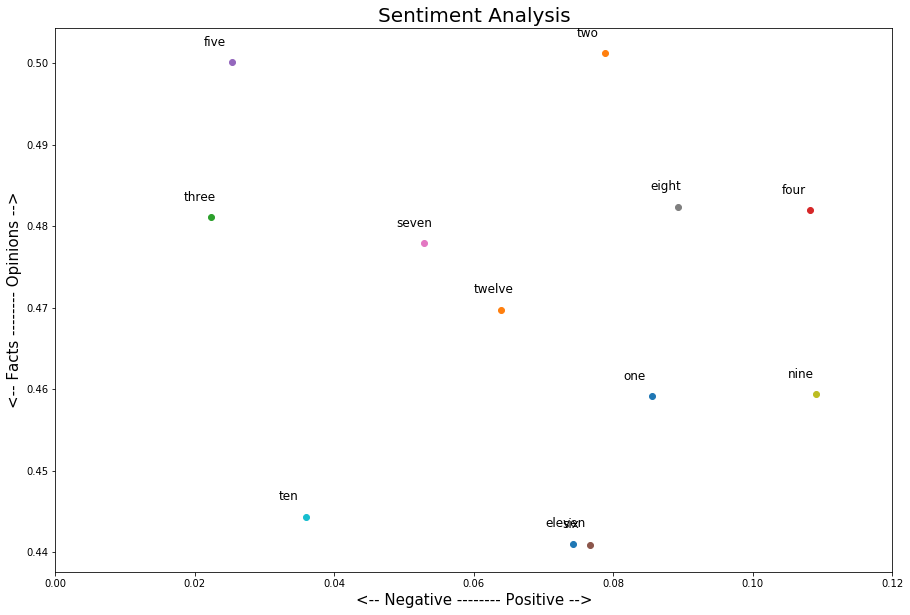

In [62]:
# polarity and subjectivity of each episode

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_df['polarity'] = data_df['transcript'].apply(pol)
data_df['subjectivity'] = data_df['transcript'].apply(sub)
data_df['season'] = seasons

plt.rcParams['figure.figsize'] = [15,10]

for index, season in enumerate(data_df.index):
    x = data_df.polarity.loc[season]
    y = data_df.subjectivity.loc[season]
    plt.scatter(x, y)
    plt.text(x-.004, y+.002, data_df['season'][index], fontsize=12)
    plt.xlim(0, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

I'm not sure if there are any real trends here. At least not sequentially, or favorite seasons- mine or those found on my google search.

Next I'll look at sentiment throughout the time of each show- if there are any patterns there. Each episode is typically around 40 minutes long, so I'll split them into 5 minute segments(8 parts each).

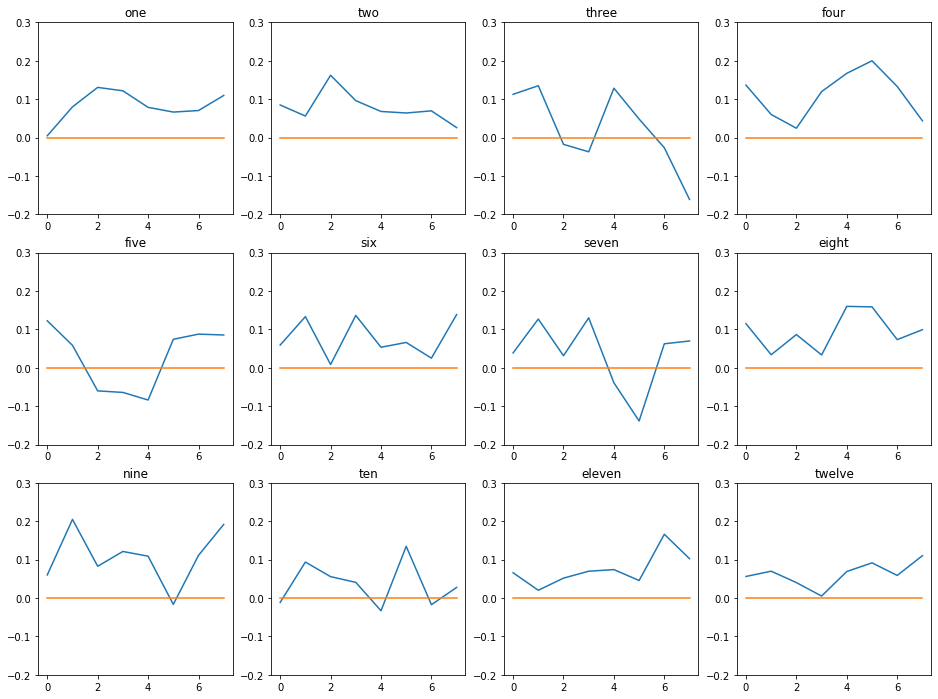

In [29]:
# sentiment of episode scene to scene- anything interesting about the sentiment over time throughout each episode?

# list to hold all of the pieces of text
list_pieces = []
for t in data_df.transcript:
    # split each episode into n parts
    split = split_text(t, n=8)
    list_pieces.append(split)

# polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

# plot sentiment sequentially by episode
plt.rcParams['figure.figsize'] = [16, 12]
for index, episode in enumerate(data_df.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,8), np.zeros(8))
    plt.title(data_df['season'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show();

Episodes two, three, four, five, seven and eleven show some decline in positivity towards the end of the episode. This is a strange coincidence with my fondness of episodes 3-7. Only season three ends below the neutral line, though. I'm a little surprised that there appears to be more positive sentiment than negative, considering this is a sex crimes show.

## more cleaning

Refining the text even more will involve lower casing , then removal of numbers, punctuation, and stop words(common, non-valuable words), and lemmatizing. 

In [30]:
# lower casing & removing numbers and punctuation
cleaning = lambda x: clean_trans(x)
data_clean = pd.DataFrame(data_df.transcript.apply(cleaning))

In [31]:
data_clean

transcript
one     sex crimes  olivia benson  elliot stabler  frank bremmer  two seven    white male  mid    multiple stab wounds     left in the cigar box  hack lic...
two     that was   sweet looking pass  too bad he couldn   break it for   td  hurry up  boys  or you ll be late for school  imagine if we still had keysha...
three   doctor  mandibular and orbital fractures  biunt force trauma to the back of the head and loss of consciousness  five centimeter knife laceration b...
four    we should get out of africa  sarah  this isn   gonna work  okay  fine  die hard  no    can   do this anymore  what  rent   movie  you and me    to...
five    veronica  good nannies are hard to find  mrs  endsley offered to double my salary if   went to work for her  lucy  go play with the other kids  an...
six     sun   up  this freak doesn   hit after dawn  you want to call it   night  yeah  one long ass night  you know what  bodega   open  you want another...
seven   don   be crazy  oh  you make me crazy  oh  no  we had   good time  let   just leave it at that    can    oh  you know  you need to get dressed now...
eight   whatever you say will be confidential  but you can still use it against me      not against you      making   recommendation  that   all  tell me ...
nine    push it back  frankie  push it back  it   coming out of that apartment down the hall  engine   to command  we got   fire and   taxpayer on the fir...
ten      no  no  no  you deal with it      not coming back to the office  look    already    promised lily we   celebrate our seven month anniversary toge...
eleven  hey  see  aah  sorry  get back here  watch it  hey  watch it  fractures of the zygomatic socket  scapula  radius  and ulna  well  it makes sense  ...
twelve  come on  move your feet  oh  yeah    spoke to the me and  excuse me  sorry  uh  you work here  hold up  captain    need to talk to   detective  yo...

In [32]:
# lemmatizing and removing stop words
data_clean.transcript = [lemmatize_sentence(transcript) for transcript in data_clean.transcript]
data_clean.transcript = [[word for word in transcript if word not in stopwords] for transcript in data_clean.transcript]
data_clean.transcript = [' '.join(transcript) for transcript in data_clean.transcript]

In [33]:
data_clean

transcript
one     sex crime olivia benson elliot stabler frank bremmer two seven white male mid multiple stab wound leave cigar box hack license make victor spicer ...
two     sweet look bad break td hurry boy late school imagine still keyshawn anyone see emily know really smoke guy excuse hold sec emily know well anyone...
three   doctor mandibular orbital fracture biunt force trauma back head loss consciousness five centimeter knife laceration right clavicle disfigure kill ...
four    get africa sarah gon work okay fine hard anymore rent movie tell serious relationship know start incredible bastard hey pretend like tell month ag...
five    veronica good nanny hard find mrs endsley offer double salary go work lucy go play kid keep jacket tell course tell possibly leave little jack dev...
six     sun freak hit dawn call night yeah long night know bodega open another cup coffee get call elliot thanks mobile base mobile base base hey think go...
seven   crazy oh make crazy oh good time let leave oh know need get dress go let talk bed mean tell go last time enough let go bed let go hurt get right y...
eight   whatever say confidential still use make recommendation tell olivia benson know like police officer experience professional good victim people tru...
nine    push back frankie push back apartment hall engine command get fire taxpayer first floor hallway knock go baby open let get lady bedroom command ne...
ten     deal back office look already promise lily celebrate seven month anniversary together chick know dude go understand look already late go piss soft...
eleven  hey see aah sorry get back watch hey watch fracture zygomatic socket scapula radius ulna well make sense got witness saw jane doe get hit cab run ...
twelve  move foot oh yeah speak excuse sorry uh work hold captain need talk detective talk detective amaro seat desk yeah letter receive letter look minut...

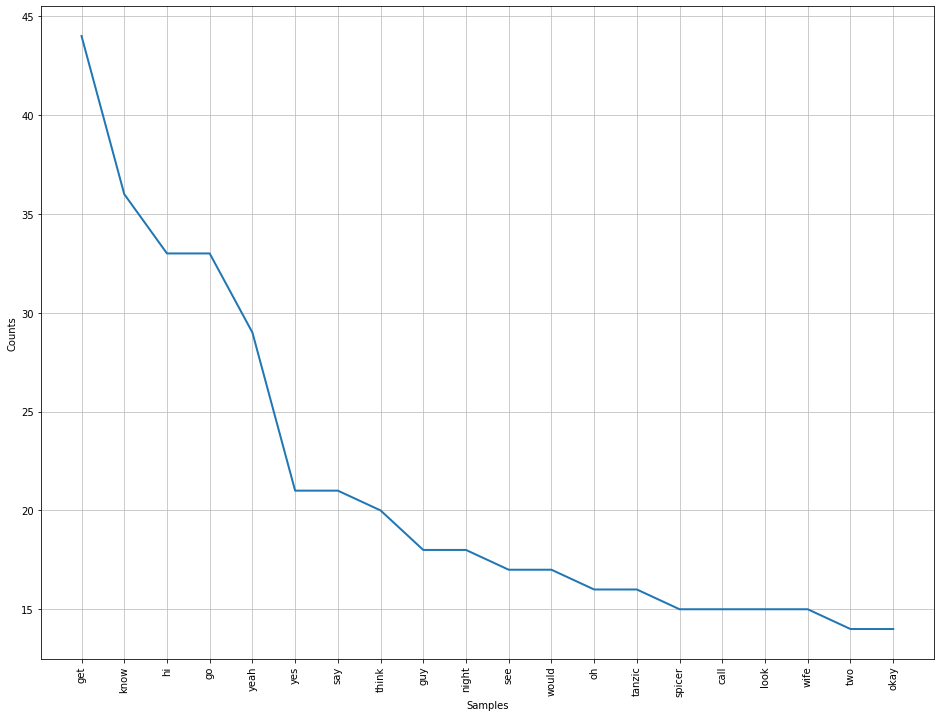

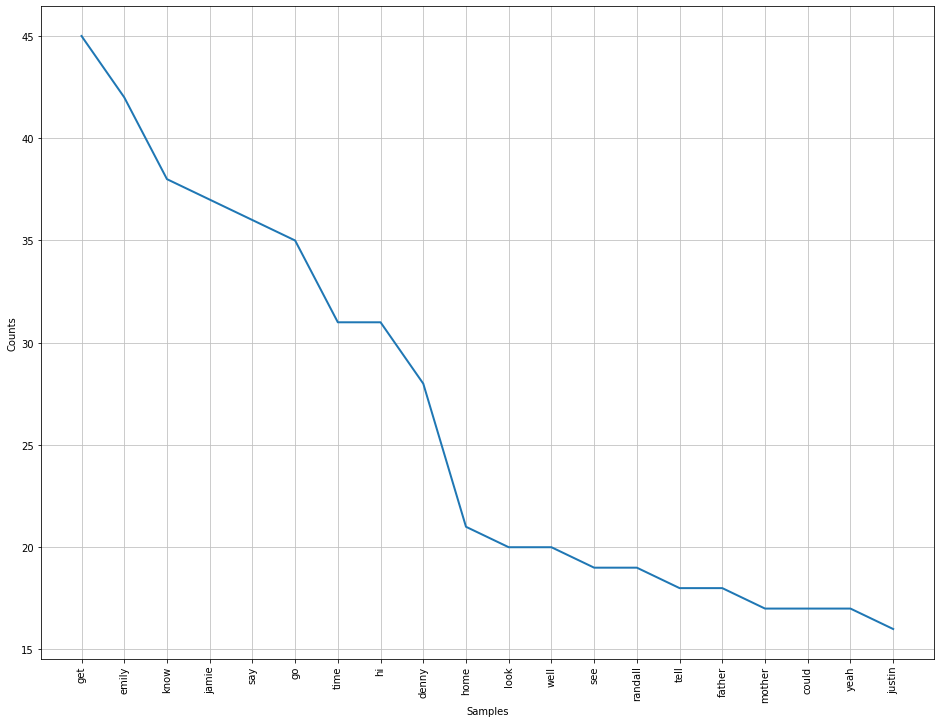

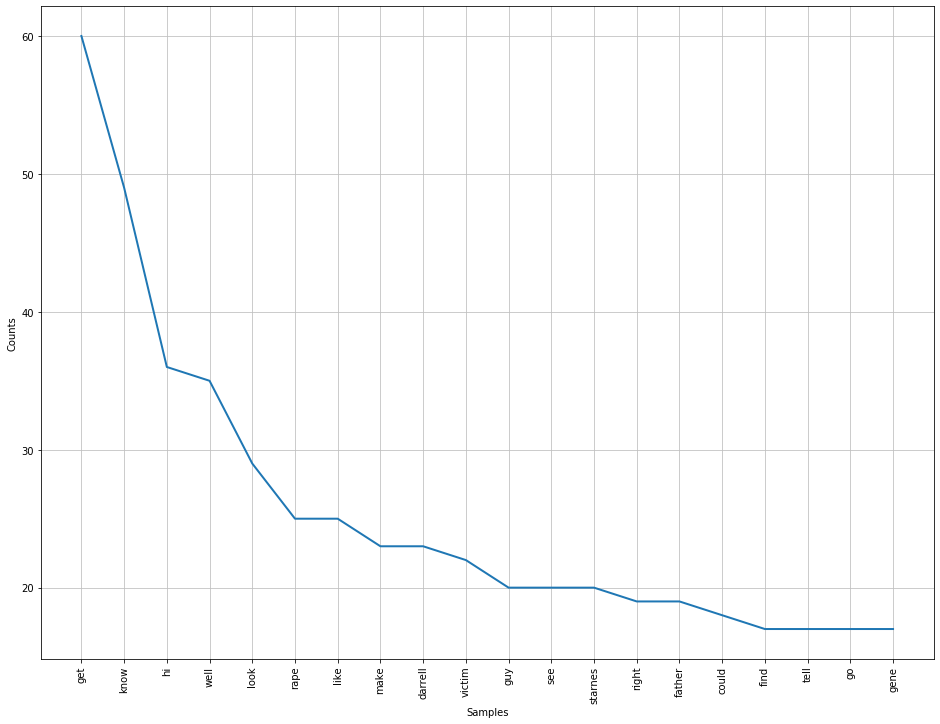

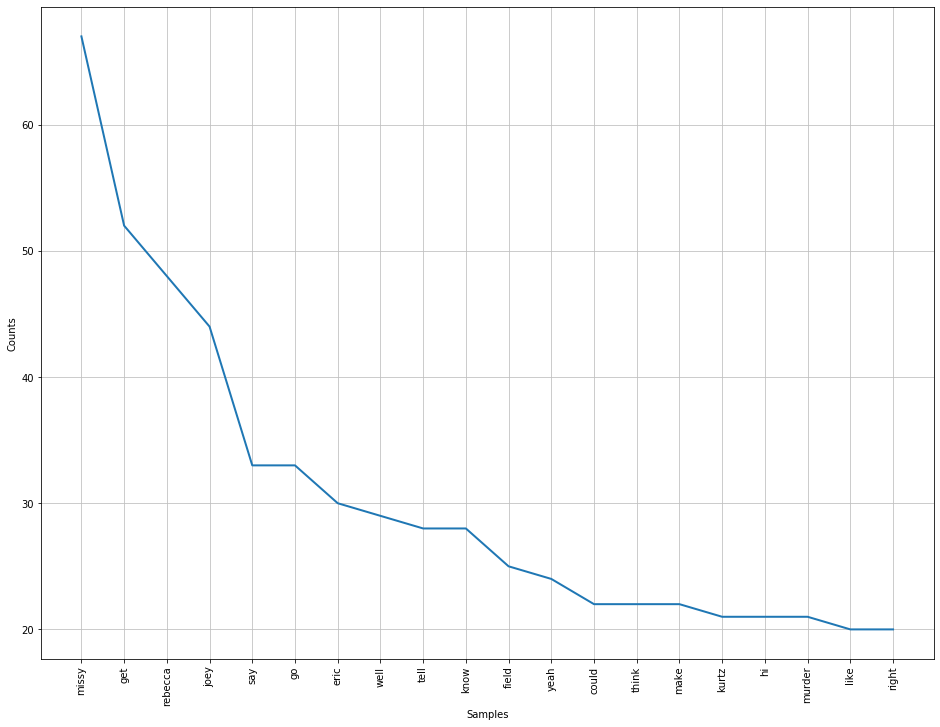

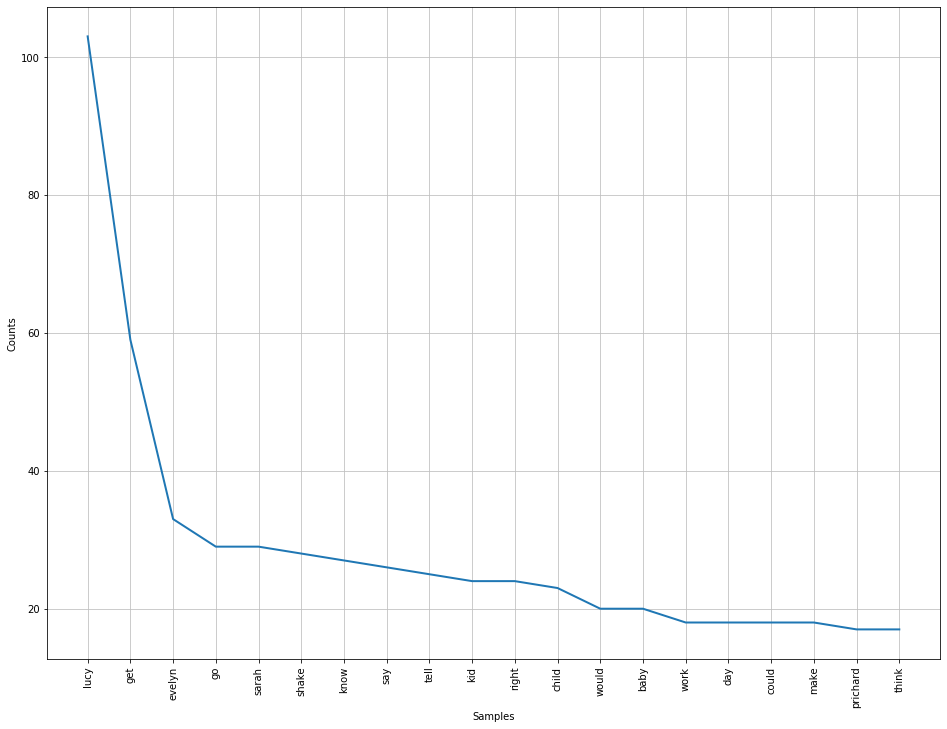

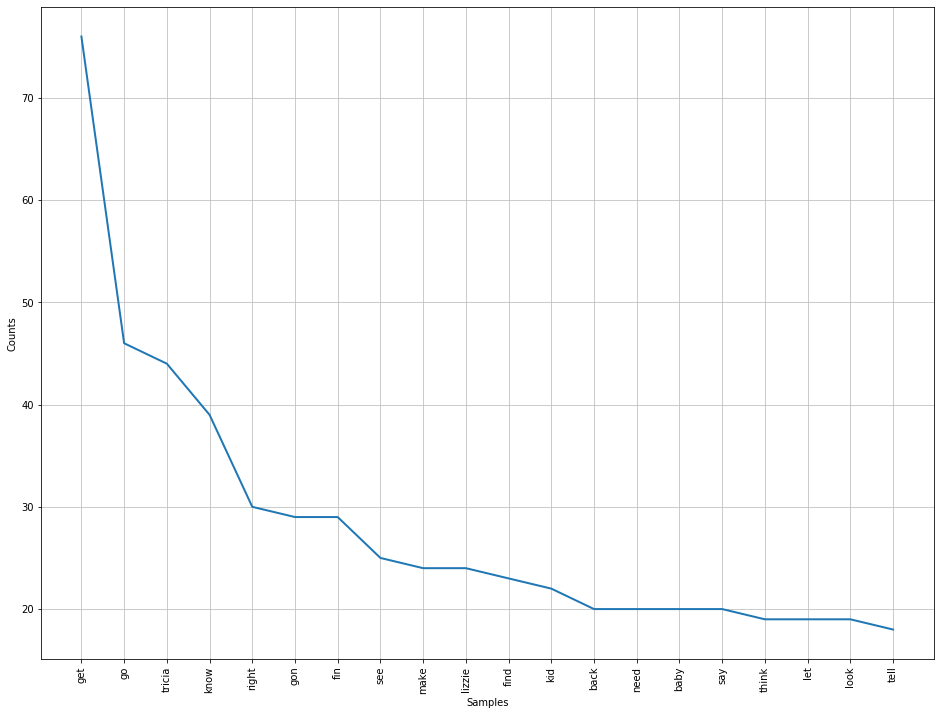

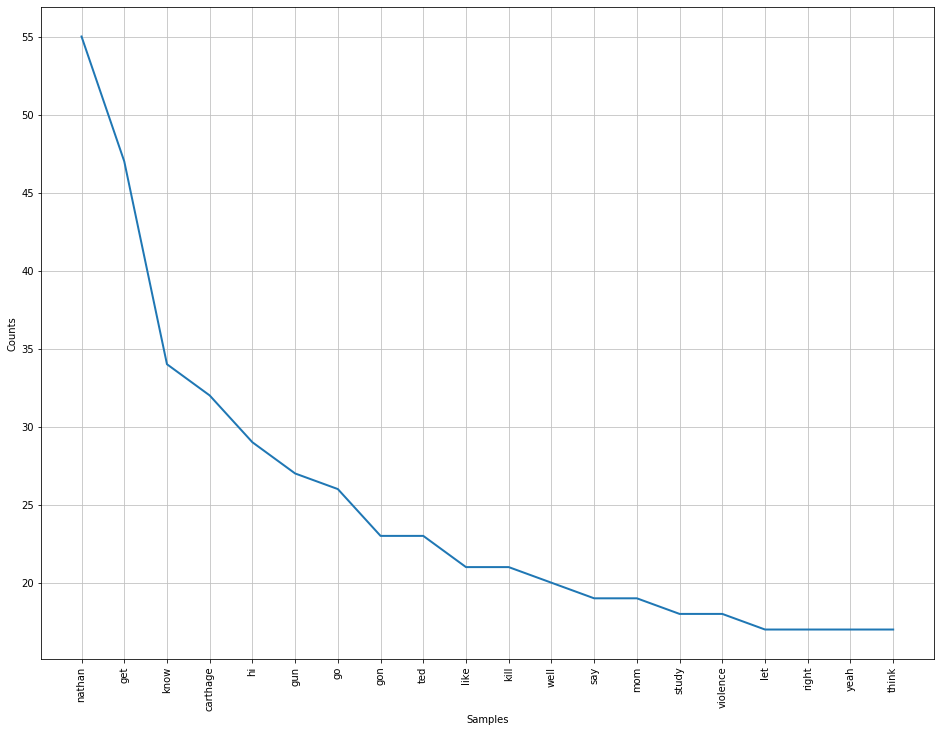

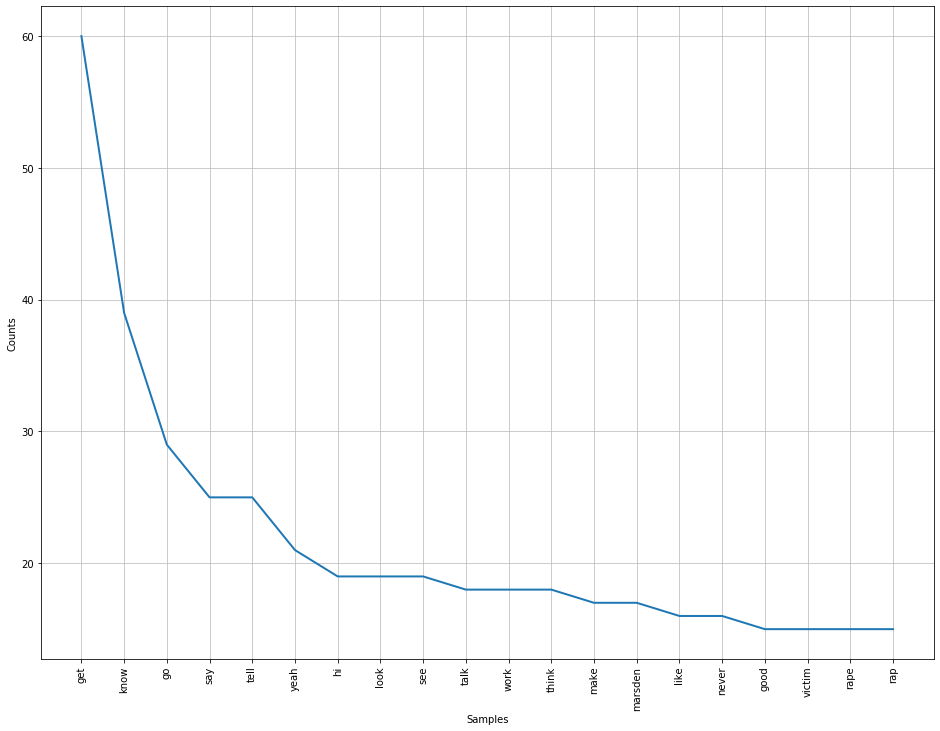

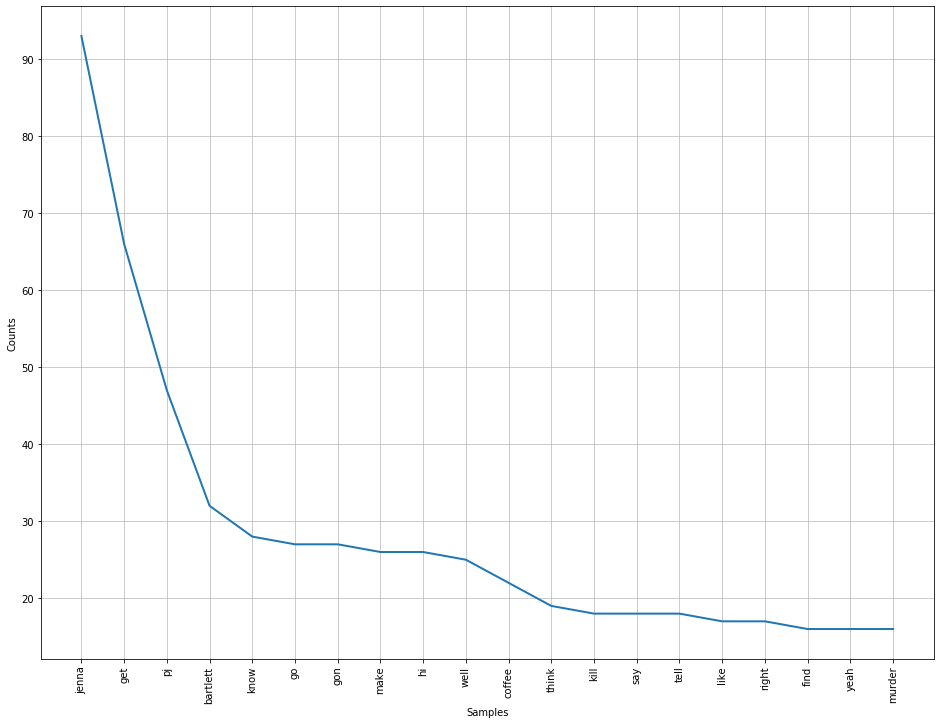

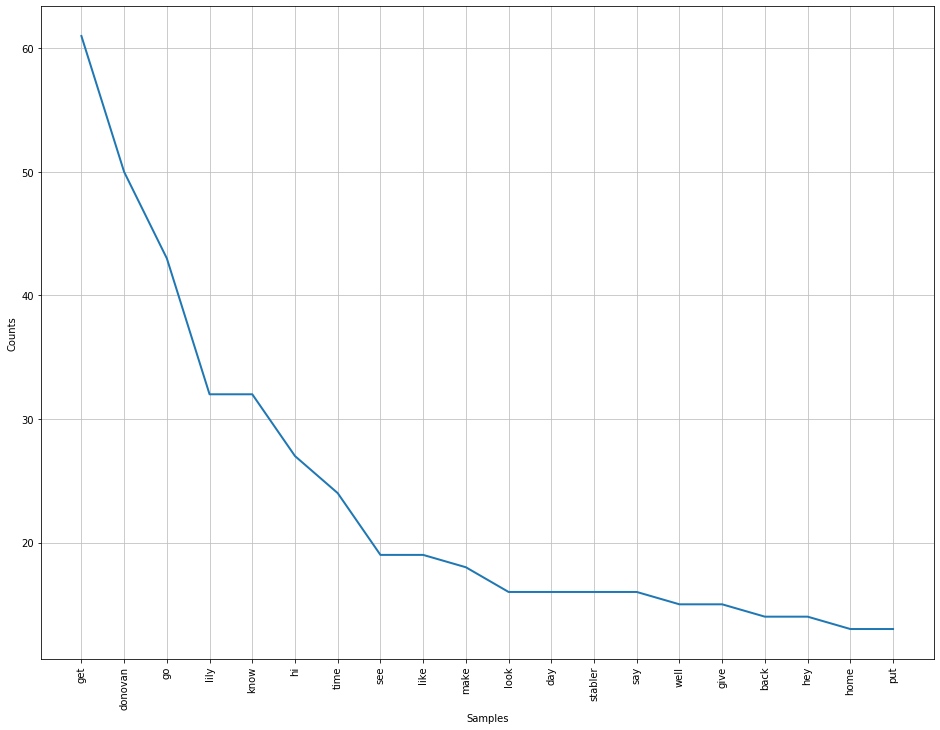

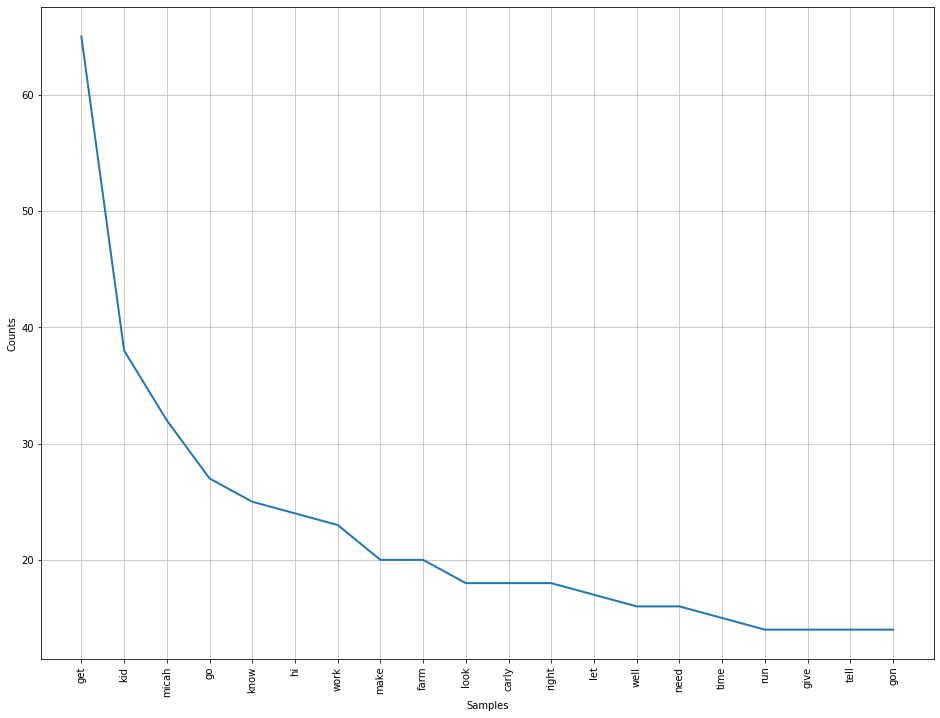

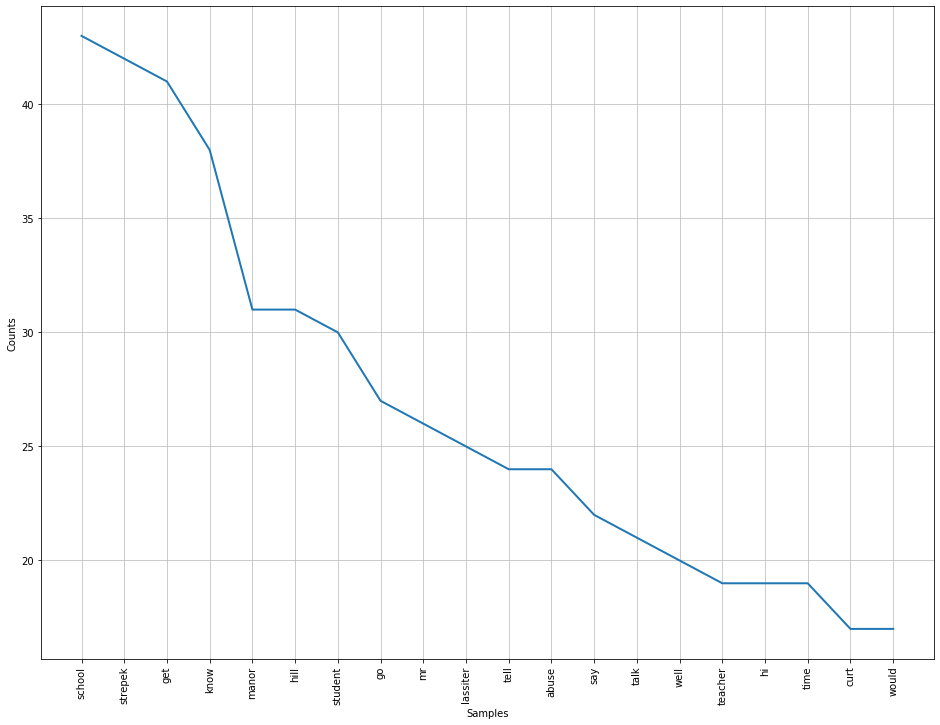

In [34]:
# word counts
for transcript in data_clean.transcript:
    transcript = lemmatize_sentence(transcript)
    freq = nltk.FreqDist(transcript)
    freq.plot(20, cumulative = False)   

## explore

In [35]:
#data_clean = data_df.copy()

In [36]:
# creating a document-term matrix using CountVectorizer
cv = CountVectorizer()
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
#data_dtm

In [37]:
data = data_dtm.transpose()

In [38]:
data.head()

one  two  three  four  five  six  seven  eight  nine  ten  eleven  \
aah        0    0      0     0     0    0      0      0     0    0       1   
ababa      0    0      0     0     0    0      0      0     1    0       0   
abandon    0    1      0     0     0    1      0      1     0    0       0   
abby       1    0      0     0     0    0      0      0     0    0       0   
abduct     0    0      0     0     0    0      0      0     0    2       0   

         twelve  
aah           0  
ababa         0  
abandon       0  
abby          0  
abduct        0

In [39]:
# Find the top 30 words said each season
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
#top_dict

__Most common words per episode:__

In [40]:
# # Print the top 15 words each season
# for season, top_words in top_dict.items():
#     print(season.upper())
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('--')
# # some words may have very little meaning and could be added to stop words.

In [41]:
# Look at the most common top words & add them to the stop word list
# top words for each season
words = []
for season in data.columns:
    top = [word for (word, count) in top_dict[season]]
    for t in top:
        words.append(t)
        
#words

In [42]:
# most common words and how many episodes they occur in
Counter(words).most_common(100)

[('get', 12),
 ('know', 12),
 ('go', 12),
 ('say', 12),
 ('hi', 11),
 ('think', 11),
 ('tell', 11),
 ('look', 10),
 ('right', 10),
 ('well', 9),
 ('yeah', 8),
 ('see', 8),
 ('find', 8),
 ('like', 8),
 ('make', 8),
 ('could', 7),
 ('would', 6),
 ('time', 6),
 ('gon', 6),
 ('guy', 5),
 ('talk', 5),
 ('okay', 4),
 ('kid', 4),
 ('give', 4),
 ('need', 4),
 ('work', 4),
 ('let', 4),
 ('good', 3),
 ('last', 3),
 ('little', 3),
 ('girl', 3),
 ('victim', 3),
 ('back', 3),
 ('night', 2),
 ('home', 2),
 ('father', 2),
 ('abuse', 2),
 ('rape', 2),
 ('murder', 2),
 ('rap', 2),
 ('people', 2),
 ('baby', 2),
 ('day', 2),
 ('hey', 2),
 ('captain', 2),
 ('kill', 2),
 ('never', 2),
 ('mr', 2),
 ('year', 2),
 ('yes', 1),
 ('oh', 1),
 ('tanzic', 1),
 ('spicer', 1),
 ('wife', 1),
 ('call', 1),
 ('cab', 1),
 ('two', 1),
 ('victor', 1),
 ('dead', 1),
 ('unit', 1),
 ('detective', 1),
 ('emily', 1),
 ('jamie', 1),
 ('denny', 1),
 ('randall', 1),
 ('mother', 1),
 ('justin', 1),
 ('mckenna', 1),
 ('hurt', 1),
 (

In [43]:
# # If more than 5 of the seasons have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
# add_stop_words.append(('ll', 've'))

In [44]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

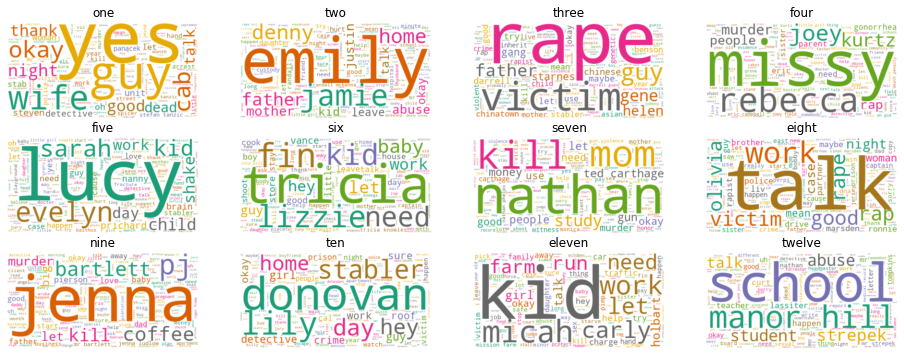

In [45]:
# wordclouds
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]
# Create subplots for each episode
for index, season in enumerate(data.columns):
    wc.generate(data_clean.transcript[season])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(seasons[index])
    
plt.show()

In [46]:
# number of unique words- identifying the non-zero items
unique_list = []
for season in data.columns:
    uniques = data[season].nonzero()[0].size
    unique_list.append(uniques)

In [47]:
# new dataframe containing unique word count
data_words = pd.DataFrame(list(zip(seasons, unique_list)), columns=['season', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

season  unique_words
7    eight           818
0      one           859
3     four           911
6    seven           913
11  twelve           913
9      ten           944
5      six           961
10  eleven          1006
4     five          1031
2    three          1049
1      two          1077
8     nine          1131

## topics

#### all text

In [48]:
data_n = pd.DataFrame(data_clean.transcript)

# add stop words
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'hi', 'tell'
                 ,'say']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_n.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_n.index

# gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [49]:
# 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.019*"lucy" + 0.010*"nathan" + 0.006*"evelyn" + 0.006*"carthage" + 0.006*"make" + 0.005*"gon" + 0.005*"sarah" + 0.005*"let" + 0.005*"need" + 0.005*"kid"'),
 (1,
  '0.008*"look" + 0.008*"make" + 0.007*"work" + 0.006*"talk" + 0.006*"kid" + 0.006*"gon" + 0.005*"let" + 0.005*"good" + 0.005*"guy" + 0.005*"okay"'),
 (2,
  '0.009*"look" + 0.008*"emily" + 0.007*"father" + 0.007*"jamie" + 0.005*"rape" + 0.005*"make" + 0.005*"denny" + 0.005*"mother" + 0.004*"let" + 0.004*"victim"'),
 (3,
  '0.016*"jenna" + 0.012*"missy" + 0.009*"make" + 0.008*"pj" + 0.008*"rebecca" + 0.008*"joey" + 0.007*"gon" + 0.006*"murder" + 0.006*"look" + 0.006*"bartlett"')]

#### verbs and nouns

In [50]:
# pull out nouns and verbs
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'VB'or pos[:2] == 'NN'  
    
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

# filter nouns and verbs
data_nouns_adj = pd.DataFrame(data_df.transcript.apply(nouns_adj))

# document-term matrix using only nouns and adjectives, also remove common words
cvna = CountVectorizer(stop_words=stop_words, max_df=.95)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
#data_dtmna

# gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [51]:
# 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.008*"lucy" + 0.005*"missy" + 0.005*"gon" + 0.005*"kid" + 0.004*"kids" + 0.004*"baby" + 0.004*"rebecca" + 0.004*"joey" + 0.004*"girl" + 0.003*"tricia"'),
 (1,
  '0.008*"jenna" + 0.005*"gon" + 0.005*"nathan" + 0.005*"mr" + 0.004*"school" + 0.004*"donovan" + 0.004*"pj" + 0.004*"night" + 0.003*"father" + 0.003*"strepek"')]

In [52]:
# 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.008*"school" + 0.006*"donovan" + 0.005*"strepek" + 0.005*"mr" + 0.005*"jamie" + 0.004*"night" + 0.004*"abuse" + 0.004*"father" + 0.004*"hill" + 0.004*"manor"'),
 (1,
  '0.007*"gon" + 0.006*"missy" + 0.005*"nathan" + 0.004*"rebecca" + 0.004*"joey" + 0.004*"kids" + 0.004*"tricia" + 0.004*"help" + 0.004*"mother" + 0.003*"kid"'),
 (2,
  '0.018*"lucy" + 0.017*"jenna" + 0.009*"pj" + 0.006*"evelyn" + 0.006*"baby" + 0.005*"sarah" + 0.005*"gon" + 0.005*"bartlett" + 0.004*"coffee" + 0.003*"murder"')]

In [53]:
# 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.009*"tricia" + 0.008*"jamie" + 0.006*"fin" + 0.006*"gon" + 0.006*"denny" + 0.006*"mother" + 0.005*"kid" + 0.005*"lizzie" + 0.005*"emily" + 0.005*"baby"'),
 (1,
  '0.022*"lucy" + 0.011*"donovan" + 0.007*"evelyn" + 0.007*"stabler" + 0.006*"sarah" + 0.005*"girl" + 0.004*"day" + 0.004*"baby" + 0.004*"night" + 0.004*"child"'),
 (2,
  '0.011*"jenna" + 0.008*"missy" + 0.007*"mr" + 0.007*"gon" + 0.006*"school" + 0.006*"rebecca" + 0.006*"pj" + 0.006*"father" + 0.005*"joey" + 0.005*"strepek"'),
 (3,
  '0.008*"nathan" + 0.006*"gon" + 0.005*"carthage" + 0.004*"kids" + 0.004*"night" + 0.004*"micah" + 0.004*"mom" + 0.004*"sex" + 0.004*"help" + 0.003*"police"')]

In [54]:
# 5 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.016*"tricia" + 0.011*"fin" + 0.010*"gon" + 0.009*"lizzie" + 0.008*"baby" + 0.006*"vance" + 0.005*"kid" + 0.005*"knowles" + 0.005*"captain" + 0.004*"house"'),
 (1,
  '0.016*"lucy" + 0.008*"school" + 0.007*"strepek" + 0.006*"jamie" + 0.005*"mr" + 0.005*"evelyn" + 0.005*"abuse" + 0.005*"manor" + 0.005*"hill" + 0.005*"sarah"'),
 (2,
  '0.010*"nathan" + 0.006*"gon" + 0.006*"carthage" + 0.005*"kids" + 0.005*"micah" + 0.005*"sex" + 0.004*"help" + 0.004*"ted" + 0.004*"money" + 0.004*"night"'),
 (3,
  '0.012*"jenna" + 0.009*"missy" + 0.007*"donovan" + 0.006*"rebecca" + 0.006*"pj" + 0.006*"gon" + 0.006*"joey" + 0.005*"stabler" + 0.004*"raped" + 0.004*"mr"'),
 (4,
  '0.008*"darrell" + 0.007*"starnes" + 0.006*"father" + 0.006*"rape" + 0.006*"helen" + 0.005*"victim" + 0.005*"guan" + 0.004*"stabler" + 0.004*"benson" + 0.004*"gang"')]

## text generator

In [56]:
# generate text- season number and n characters
gen_text(12, count = 20)

Five years? No. Are you here to a few nights ago to sue me know of anyone in on me..


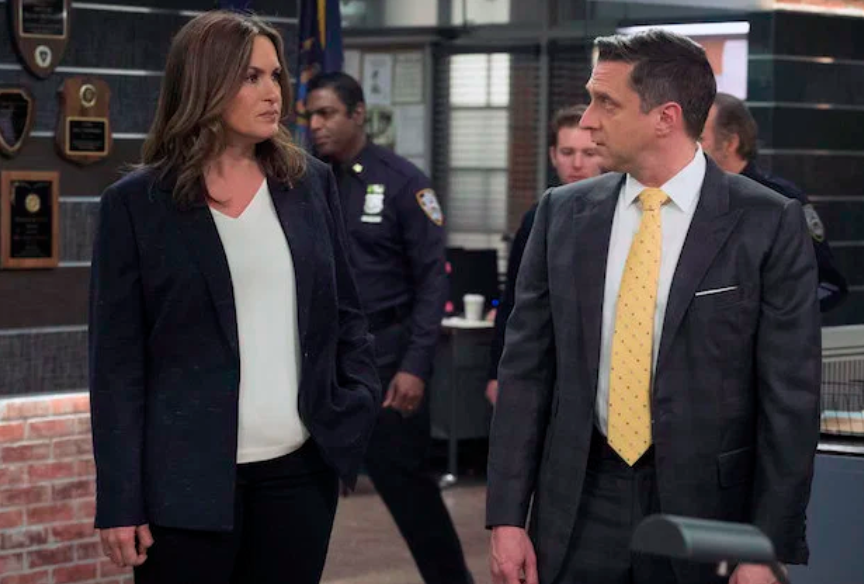